# 9. Backtesting vectorizado

En términos prácticos, necesitamos crear una estrategia de inversión para determinar cuándo comprar y cuándo vender. Esto se puede hacer usando distintas técnicas. Para este ejemplo usaremos **medias móviles simples** para determinar cuándo comprar y vender acciones de Apple entre 2020 y 2024.

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np

df = yf.download("AAPL", start = "2020-01-01", end = "2024-12-31", auto_adjust=True, multi_level_index=False)
df.head()

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400
2020-01-03,71.833290,72.594055,71.608685,71.765667,146322800
2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200
2020-01-07,72.065132,72.671325,71.845354,72.415322,108872000
2020-01-08,73.224396,73.526287,71.768071,71.768071,132079200


Calculemos el retorno y una media móvil simple de 20 días.

In [ ]:
!pip install TA-Lib --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 52.7 MB/s eta 0:00:00


In [ ]:
import talib

df["ret"] = np.log(df["Close"] / df["Close"].shift(1))
df["sma_20"] = talib.SMA(df["Close"], timeperiod = 20)

df = df[['Close', 'ret', 'sma_20']].dropna()

df.head()

,Close,ret,sma_20
Date,,,
2020-01-30,78.218903,-0.001450,75.360955
2020-01-31,74.750771,-0.045352,75.471568
2020-02-03,74.545494,-0.002750,75.607178
2020-02-04,77.006516,0.032480,75.837220
2020-02-05,77.634453,0.008121,76.115686


Crearemos el vector de señales:

* Si SMA "corta hacia abajo" al precio, entonces **compra**
* Si SMA "corta hacia arriba" al precio, entonces **vende**

In [ ]:
df["senal"] = (df["Close"] > df["sma_20"]).astype(int)
df

,Close,ret,sma_20,senal
Date,,,,
2020-01-30,78.218903,-0.001450,75.360955,1
2020-01-31,74.750771,-0.045352,75.471568,0
2020-02-03,74.545494,-0.002750,75.607178,0
2020-02-04,77.006516,0.032480,75.837220,1
2020-02-05,77.634453,0.008121,76.115686,1
...,...,...,...,...
2024-12-23,254.367035,0.003060,244.160250,1
2024-12-24,257.286682,0.011413,245.422272,1
2024-12-26,258.103729,0.003171,246.616033,1


Gráficamente:

<Axes: xlabel='Date'>

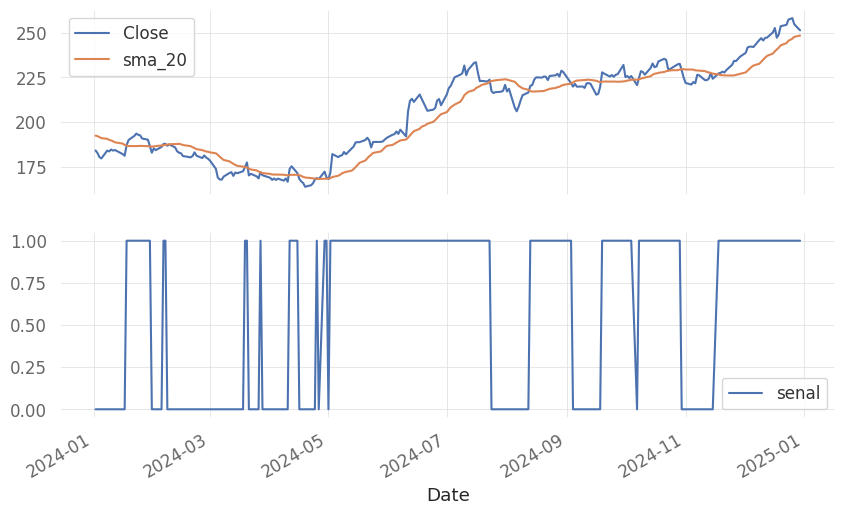

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, sharex = True)

df.loc["2024", ["Close", "sma_20"]].plot(ax=ax[0])
df.loc["2024", ["senal"]].plot(ax=ax[1])

Calculemos la rentabilidad diaria y acumulada de la estrategia:

In [ ]:
df["ret_est"]=df["senal"].shift(1) * df["ret"]
df.head(30)

,Close,ret,sma_20,senal,ret_est
Date,,,,,
2020-01-30,78.218903,-0.001450,75.360955,1,NaN
2020-01-31,74.750771,-0.045352,75.471568,0,-0.045352
2020-02-03,74.545494,-0.002750,75.607178,0,-0.000000
2020-02-04,77.006516,0.032480,75.837220,1,0.000000
2020-02-05,77.634453,0.008121,76.115686,1,0.008121
2020-02-06,78.542519,0.011629,76.381592,1,0.011629
2020-02-07,77.474930,-0.013686,76.516351,1,-0.013686
2020-02-10,77.842911,0.004738,76.661055,1,0.004738
2020-02-11,77.373245,-0.006052,76.702215,1,-0.006052


In [ ]:
df["ret_est_cum"] = np.exp(df["ret_est"].cumsum())
df

,Close,ret,sma_20,senal,ret_est,ret_est_cum
Date,,,,,,
2020-01-30,78.218903,-0.001450,75.360955,1,NaN,NaN
2020-01-31,74.750771,-0.045352,75.471568,0,-0.045352,0.955661
2020-02-03,74.545494,-0.002750,75.607178,0,-0.000000,0.955661
2020-02-04,77.006516,0.032480,75.837220,1,0.000000,0.955661
2020-02-05,77.634453,0.008121,76.115686,1,0.008121,0.963454
...,...,...,...,...,...,...
2024-12-23,254.367035,0.003060,244.160250,1,0.003060,3.519215
2024-12-24,257.286682,0.011413,245.422272,1,0.011413,3.559609
2024-12-26,258.103729,0.003171,246.616033,1,0.003171,3.570913


Si ahora lo comparamos con haber seguido una estrategia buy-and-hold, tendríamos:

<Axes: xlabel='Date'>

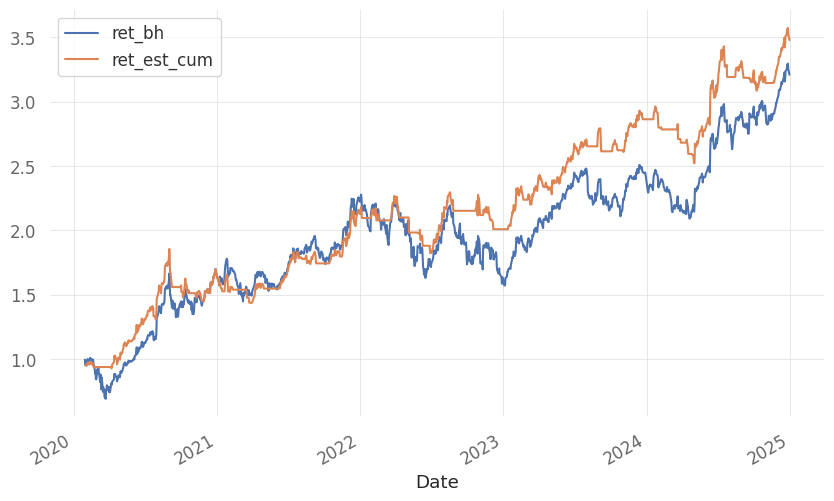

In [ ]:
df["ret_bh"] = np.exp(df["ret"].cumsum())
df[["ret_bh", "ret_est_cum"]].plot()

In [ ]:
!pip install quantstats --quiet

import quantstats as qs

rf = .04
qs.reports.metrics(df["ret_est"], benchmark = "AAPL", rf = rf, mode = "full", prepare_returns = False)

                           Benchmark (AAPL)    Strategy
-------------------------  ------------------  ----------
Start Period               2020-01-31          2020-01-31
End Period                 2024-12-30          2024-12-30
Risk-Free Rate             4.0%                4.0%
Time in Market             100.0%              61.0%

Cumulative Return          236.19%             227.19%
CAGR﹪                     28.02%              27.31%

Sharpe                     0.81                1.08
Prob. Sharpe Ratio         74.85%              92.04%
Smart Sharpe               0.81                1.07
Sortino                    1.2                 1.65
Smart Sortino              1.19                1.63
Sortino/√2                 0.85                1.16
Smart Sortino/√2           0.84                1.15
Omega                      1.27                1.27

Max Drawdown               -31.43%             -24.07%
Max DD Date                2020-03-23          2021-03-24
Max DD Period Start    

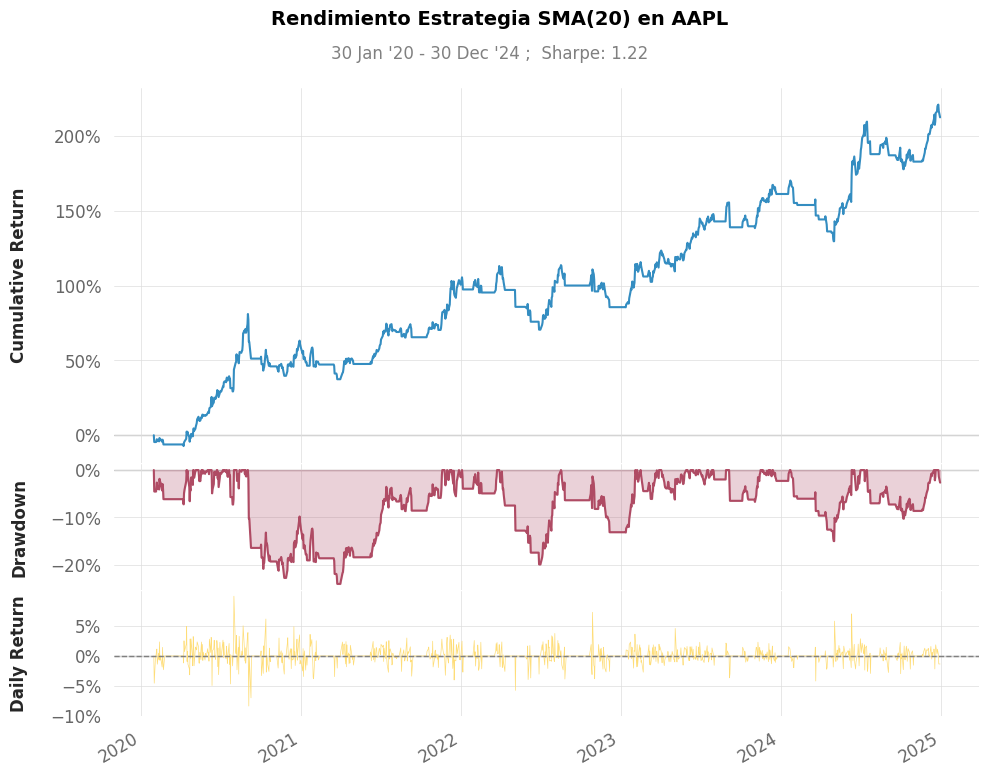

In [ ]:
qs.plots.snapshot(df["ret_est"], title = "Rendimiento Estrategia SMA(20) en AAPL")